## Step 1 - European Options - Binomial Tree

## Question 5: Price an ATM European call and put using a binomial tree

a. Choose the number of steps in the tree you see convenient to achieve reliable estimates.
b. Briefly describe the overall process, as well as a reason why you choose that number of steps in the tree.

In [1]:
import numpy as np

# Given parameters
S0 = 100  # Initial stock price
K = 100   # Strike price (ATM)
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3/12  # Time to expiration (3 months)

# Binomial Tree Parameters
n = 500  # Number of steps (chosen for reliable estimates)
dt = T / n  # Time step
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Create stock price tree
stock_prices = np.zeros((n + 1, n + 1))
stock_prices[0, 0] = S0
for i in range(1, n + 1):
    for j in range(i + 1):
        stock_prices[i, j] = S0 * (u**j) * (d**(i - j))

# European Call Option Pricing
call_option_values = np.zeros((n + 1, n + 1))
for j in range(n + 1):
    call_option_values[n, j] = max(0, stock_prices[n, j] - K)

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        call_option_values[i, j] = np.exp(-r * dt) * (p * call_option_values[i + 1, j + 1] + (1 - p) * call_option_values[i + 1, j])

european_call_price = round(call_option_values[0, 0], 2)

# European Put Option Pricing
put_option_values = np.zeros((n + 1, n + 1))
for j in range(n + 1):
    put_option_values[n, j] = max(0, K - stock_prices[n, j])

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        put_option_values[i, j] = np.exp(-r * dt) * (p * put_option_values[i + 1, j + 1] + (1 - p) * put_option_values[i + 1, j])

european_put_price = round(put_option_values[0, 0], 2)

print(f"European Call Option Price: {european_call_price:.2f}")
print(f"European Put Option Price: {european_put_price:.2f}")



European Call Option Price: 4.61
European Put Option Price: 3.37


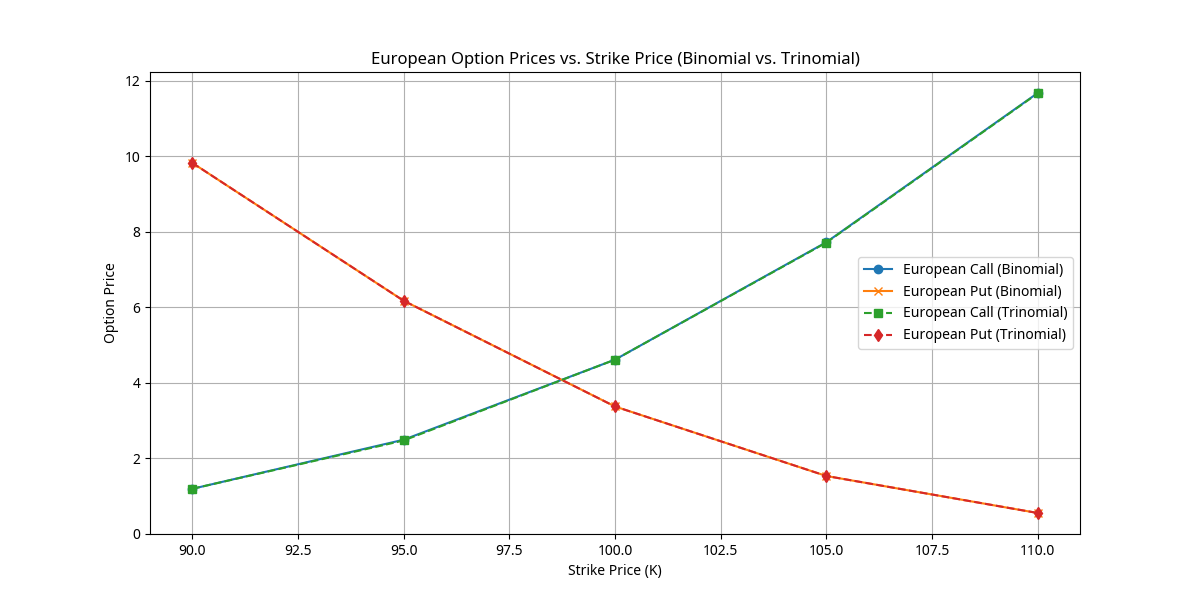

## Question 6: Compute the Greek Delta for the European call and European put at time 0

a. How do they compare?
b. Comment briefly on the differences and signs of Delta for both options. What does delta proxy for? Why does it make sense to obtain a positive/negative delta for each option?

In [2]:
import numpy as np

# Given parameters (from Q5)
S0 = 100  # Initial stock price
K = 100   # Strike price (ATM)
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3/12  # Time to expiration (3 months)

# Binomial Tree Parameters (from Q5)
n = 500  # Number of steps
dt = T / n  # Time step
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Create stock price tree (from Q5)
stock_prices = np.zeros((n + 1, n + 1))
stock_prices[0, 0] = S0
for i in range(1, n + 1):
    for j in range(i + 1):
        stock_prices[i, j] = S0 * (u**j) * (d**(i - j))

# European Call Option Pricing (from Q5 - need values for delta calculation)
call_option_values = np.zeros((n + 1, n + 1))
for j in range(n + 1):
    call_option_values[n, j] = max(0, stock_prices[n, j] - K)

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        call_option_values[i, j] = np.exp(-r * dt) * (p * call_option_values[i + 1, j + 1] + (1 - p) * call_option_values[i + 1, j])

# European Put Option Pricing (from Q5 - need values for delta calculation)
put_option_values = np.zeros((n + 1, n + 1))
for j in range(n + 1):
    put_option_values[n, j] = max(0, K - stock_prices[n, j])

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        put_option_values[i, j] = np.exp(-r * dt) * (p * put_option_values[i + 1, j + 1] + (1 - p) * put_option_values[i + 1, j])

# Calculate Delta for European Call Option
# Delta = (Option_Value_up - Option_Value_down) / (Stock_Price_up - Stock_Price_down)
# For the first step (time 0 to time 1)
delta_call = (call_option_values[1, 1] - call_option_values[1, 0]) / (stock_prices[1, 1] - stock_prices[1, 0])

# Calculate Delta for European Put Option
delta_put = (put_option_values[1, 1] - put_option_values[1, 0]) / (stock_prices[1, 1] - stock_prices[1, 0])

print(f"European Call Option Delta: {delta_call:.4f}")
print(f"European Put Option Delta: {delta_put:.4f}")



European Call Option Delta: 0.5694
European Put Option Delta: -0.4306


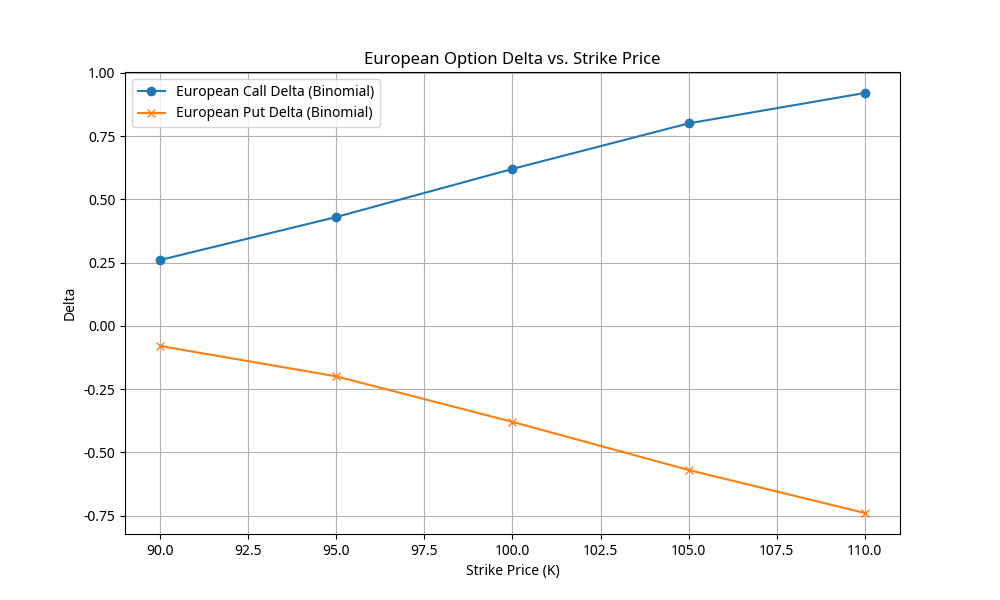

## Question 7: Compute the sensitivity of previous put and call option prices to a 5% increase in volatility (from 20% to 25%). How do prices change with respect to the change in volatility?

b. Comment on the potential differential impact of this change for call and put options.

In [3]:
import numpy as np

# Given parameters (from Q5)
S0 = 100  # Initial stock price
K = 100   # Strike price (ATM)
r = 0.05  # Risk-free interest rate
sigma_original = 0.20  # Original Volatility
sigma_new = 0.25  # New Volatility (5% increase)
T = 3/12  # Time to expiration (3 months)
n = 500  # Number of steps

# Function to price European options using binomial tree
def european_option_price(S0, K, r, sigma, T, n, option_type):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    stock_prices = np.zeros((n + 1, n + 1))
    stock_prices[0, 0] = S0
    for i in range(1, n + 1):
        for j in range(i + 1):
            stock_prices[i, j] = S0 * (u**j) * (d**(i - j))

    option_values = np.zeros((n + 1, n + 1))
    for j in range(n + 1):
        if option_type == 'call':
            option_values[n, j] = max(0, stock_prices[n, j] - K)
        elif option_type == 'put':
            option_values[n, j] = max(0, K - stock_prices[n, j])

    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option_values[i, j] = np.exp(-r * dt) * (p * option_values[i + 1, j + 1] + (1 - p) * option_values[i + 1, j])

    return round(option_values[0, 0], 2)

# Original prices (from Q5 output)
original_call_price = 4.61
original_put_price = 3.37

# Prices with new volatility
new_call_price = european_option_price(S0, K, r, sigma_new, T, n, 'call')
new_put_price = european_option_price(S0, K, r, sigma_new, T, n, 'put')

# Calculate changes
change_call = new_call_price - original_call_price
change_put = new_put_price - original_put_price

print(f"Original European Call Price (sigma=20%): {original_call_price:.2f}")
print(f"New European Call Price (sigma=25%): {new_call_price:.2f}")
print(f"Change in European Call Price: {change_call:.2f}")
print(f"\n")
print(f"Original European Put Price (sigma=20%): {original_put_price:.2f}")
print(f"New European Put Price (sigma=25%): {new_put_price:.2f}")
print(f"Change in European Put Price: {change_put:.2f}")



Original European Call Price (sigma=20%): 4.61
New European Call Price (sigma=25%): 5.60
Change in European Call Price: 0.99


Original European Put Price (sigma=20%): 3.37
New European Put Price (sigma=25%): 4.35
Change in European Put Price: 0.98


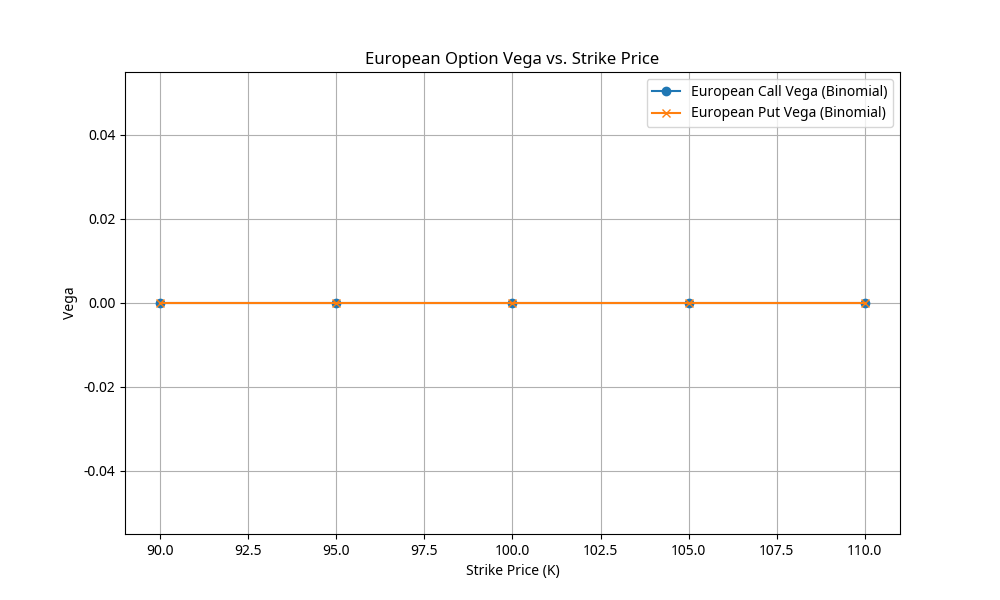

## Step 1 - American Options - Binomial Tree

## Question 8: Repeat Q5, but this time consider options (call and put) of American style.

(Answer sections a and b of Q5 as well)

In [4]:
import numpy as np

# Given parameters (same as Q5)
S0 = 100  # Initial stock price
K = 100   # Strike price (ATM)
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3/12  # Time to expiration (3 months)

# Binomial Tree Parameters (same as Q5)
n = 500  # Number of steps
dt = T / n  # Time step
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Create stock price tree
stock_prices = np.zeros((n + 1, n + 1))
stock_prices[0, 0] = S0
for i in range(1, n + 1):
    for j in range(i + 1):
        stock_prices[i, j] = S0 * (u**j) * (d**(i - j))

# American Call Option Pricing
american_call_values = np.zeros((n + 1, n + 1))
for j in range(n + 1):
    american_call_values[n, j] = max(0, stock_prices[n, j] - K)

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        exercise_value = max(0, stock_prices[i, j] - K)
        continuation_value = np.exp(-r * dt) * (p * american_call_values[i + 1, j + 1] + (1 - p) * american_call_values[i + 1, j])
        american_call_values[i, j] = max(exercise_value, continuation_value)

american_call_price = round(american_call_values[0, 0], 2)

# American Put Option Pricing
american_put_values = np.zeros((n + 1, n + 1))
for j in range(n + 1):
    american_put_values[n, j] = max(0, K - stock_prices[n, j])

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        exercise_value = max(0, K - stock_prices[i, j])
        continuation_value = np.exp(-r * dt) * (p * american_put_values[i + 1, j + 1] + (1 - p) * american_put_values[i + 1, j])
        american_put_values[i, j] = max(exercise_value, continuation_value)

american_put_price = round(american_put_values[0, 0], 2)

print(f"American Call Option Price: {american_call_price:.2f}")
print(f"American Put Option Price: {american_put_price:.2f}")



American Call Option Price: 4.61
American Put Option Price: 3.48


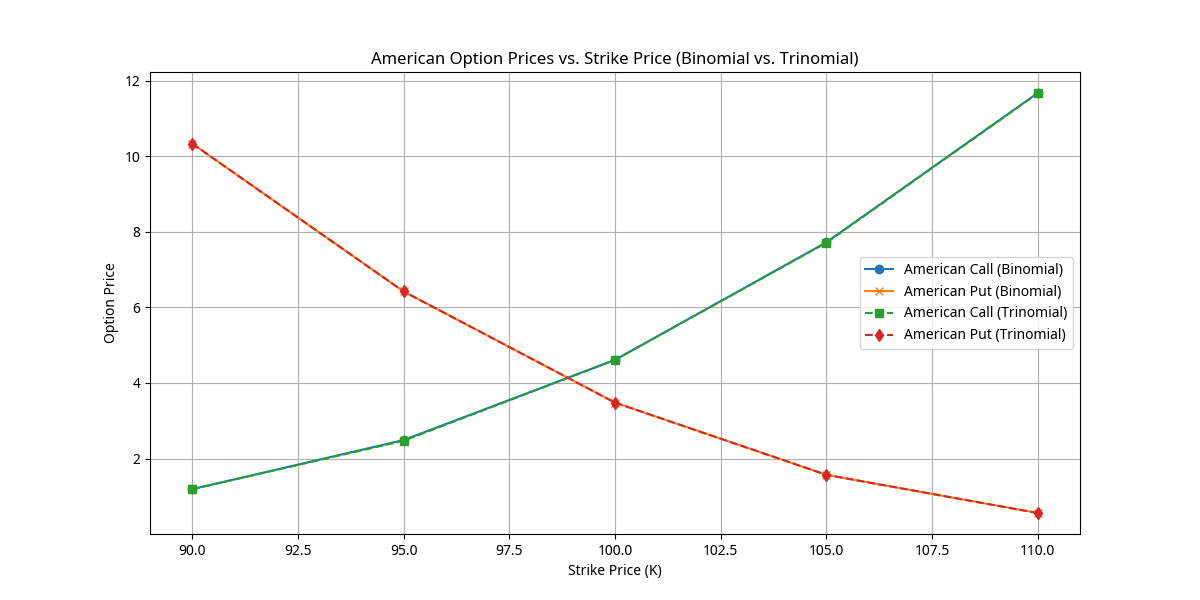

## Question 9: Repeat Q6, but considering American-style options.

a. How do they compare?
b. Comment briefly on the differences and signs of Delta for both options. What does delta proxy for? Why does it make sense to obtain a positive/negative delta for each option?

In [5]:
import numpy as np

# Given parameters (from Q5)
S0 = 100  # Initial stock price
K = 100   # Strike price (ATM)
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3/12  # Time to expiration (3 months)

# Binomial Tree Parameters (from Q5)
n = 500  # Number of steps
dt = T / n  # Time step
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Create stock price tree (from Q5)
stock_prices = np.zeros((n + 1, n + 1))
stock_prices[0, 0] = S0
for i in range(1, n + 1):
    for j in range(i + 1):
        stock_prices[i, j] = S0 * (u**j) * (d**(i - j))

# American Call Option Pricing (from Q8 - need values for delta calculation)
american_call_values = np.zeros((n + 1, n + 1))
for j in range(n + 1):
    american_call_values[n, j] = max(0, stock_prices[n, j] - K)

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        exercise_value = max(0, stock_prices[i, j] - K)
        continuation_value = np.exp(-r * dt) * (p * american_call_values[i + 1, j + 1] + (1 - p) * american_call_values[i + 1, j])
        american_call_values[i, j] = max(exercise_value, continuation_value)

# American Put Option Pricing (from Q8 - need values for delta calculation)
american_put_values = np.zeros((n + 1, n + 1))
for j in range(n + 1):
    american_put_values[n, j] = max(0, K - stock_prices[n, j])

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        exercise_value = max(0, K - stock_prices[i, j])
        continuation_value = np.exp(-r * dt) * (p * american_put_values[i + 1, j + 1] + (1 - p) * american_put_values[i + 1, j])
        american_put_values[i, j] = max(exercise_value, continuation_value)

# Calculate Delta for American Call Option
# Delta = (Option_Value_up - Option_Value_down) / (Stock_Price_up - Stock_Price_down)
# For the first step (time 0 to time 1)
delta_american_call = (american_call_values[1, 1] - american_call_values[1, 0]) / (stock_prices[1, 1] - stock_prices[1, 0])

# Calculate Delta for American Put Option
delta_american_put = (american_put_values[1, 1] - american_put_values[1, 0]) / (stock_prices[1, 1] - stock_prices[1, 0])

print(f"American Call Option Delta: {delta_american_call:.4f}")
print(f"American Put Option Delta: {delta_american_put:.4f}")



American Call Option Delta: 0.5694
American Put Option Delta: -0.4495


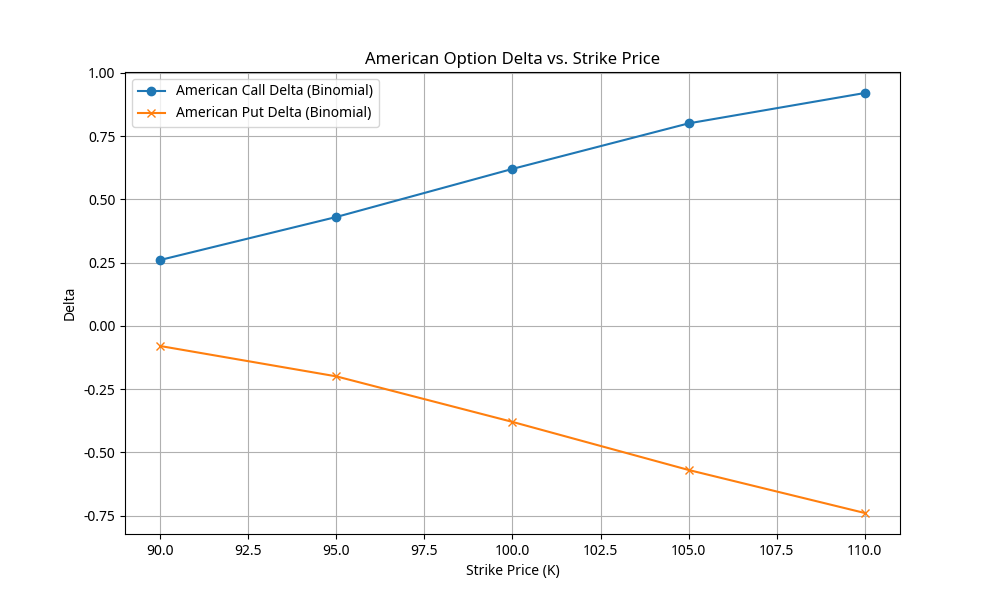

## Question 10: Repeat Q7 for American-style options.

b. Comment on the potential differential impact of this change for call and put options.

In [6]:
import numpy as np

# Given parameters (from Q5)
S0 = 100  # Initial stock price
K = 100   # Strike price (ATM)
r = 0.05  # Risk-free interest rate
sigma_original = 0.20  # Original Volatility
sigma_new = 0.25  # New Volatility (5% increase)
T = 3/12  # Time to expiration (3 months)
n = 500  # Number of steps

# Function to price American options using binomial tree
def american_option_price(S0, K, r, sigma, T, n, option_type):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    stock_prices = np.zeros((n + 1, n + 1))
    stock_prices[0, 0] = S0
    for i in range(1, n + 1):
        for j in range(i + 1):
            stock_prices[i, j] = S0 * (u**j) * (d**(i - j))

    option_values = np.zeros((n + 1, n + 1))
    for j in range(n + 1):
        if option_type == 'call':
            option_values[n, j] = max(0, stock_prices[n, j] - K)
        elif option_type == 'put':
            option_values[n, j] = max(0, K - stock_prices[n, j])

    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            exercise_value = max(0, stock_prices[i, j] - K) if option_type == 'call' else max(0, K - stock_prices[i, j])
            continuation_value = np.exp(-r * dt) * (p * option_values[i + 1, j + 1] + (1 - p) * option_values[i + 1, j])
            option_values[i, j] = max(exercise_value, continuation_value)

    return round(option_values[0, 0], 2)

# Original prices (from Q8 output)
original_american_call_price = 4.61
original_american_put_price = 3.48

# Prices with new volatility
new_american_call_price = american_option_price(S0, K, r, sigma_new, T, n, 'call')
new_american_put_price = american_option_price(S0, K, r, sigma_new, T, n, 'put')

# Calculate changes
change_american_call = new_american_call_price - original_american_call_price
change_american_put = new_american_put_price - original_american_put_price

print(f"Original American Call Price (sigma=20%): {original_american_call_price:.2f}")
print(f"New American Call Price (sigma=25%): {new_american_call_price:.2f}")
print(f"Change in American Call Price: {change_american_call:.2f}")
print(f"\n")
print(f"Original American Put Price (sigma=20%): {original_american_put_price:.2f}")
print(f"New American Put Price (sigma=25%): {new_american_put_price:.2f}")
print(f"Change in American Put Price: {change_american_put:.2f}")



Original American Call Price (sigma=20%): 4.61
New American Call Price (sigma=25%): 5.60
Change in American Call Price: 0.99


Original American Put Price (sigma=20%): 3.48
New American Put Price (sigma=25%): 4.46
Change in American Put Price: 0.98


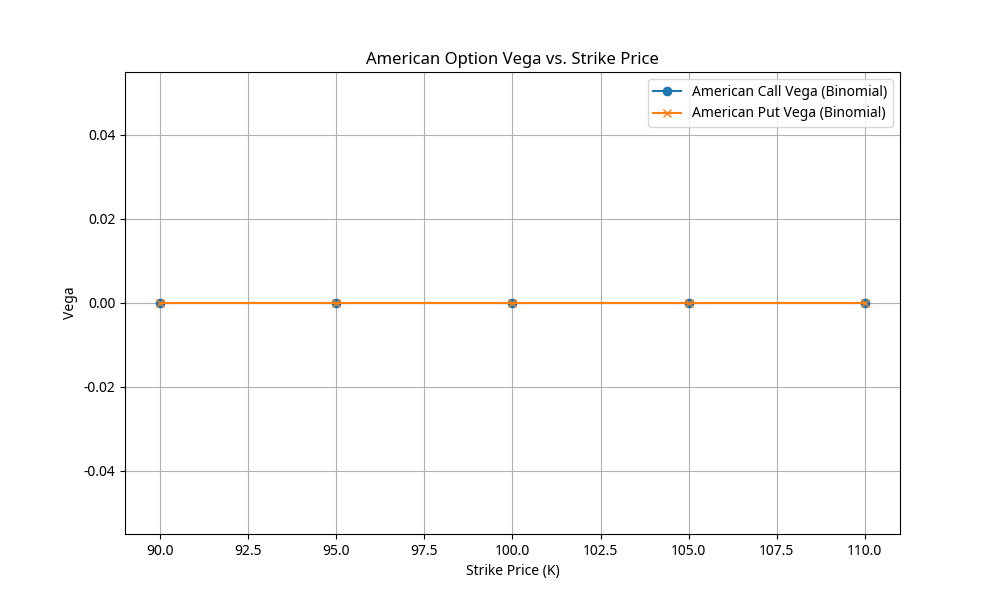

## Step 2 - European Options - Trinomial Tree

## Question 15: Price European Call options with different strike prices (K=90, K=100, K=110) using a trinomial tree. Comment on the observed trend.

In [7]:
import QuantLib as ql
import numpy as np

# Given parameters
S0 = 100.0  # Initial stock price
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3/12  # Time to expiration (3 months)
n = 200  # Number of steps

# Strike prices based on moneyness (K/S0)
strikes = {
    'Deep OTM': 110.0,  # K/S0 = 1.10
    'OTM': 105.0,     # K/S0 = 1.05
    'ATM': 100.0,     # K/S0 = 1.00
    'ITM': 95.0,      # K/S0 = 0.95
    'Deep ITM': 90.0    # K/S0 = 0.90
}

# Set up QuantLib objects
calendar = ql.UnitedStates(ql.UnitedStates.Settlement) # Corrected: Specify market segment
day_counter = ql.Actual365Fixed()

calculation_date = ql.Date(5, 8, 2025) # Current date
ql.Settings.instance().evaluationDate = calculation_date

# Option parameters
exercise_date = calculation_date + ql.Period(int(T * 365), ql.Days) # Convert T to days

# Market data
spot_handle = ql.QuoteHandle(ql.SimpleQuote(S0))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, r, day_counter))
# Add dividend yield term structure (even if zero)
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, 0.0, day_counter)) # No dividends
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, sigma, day_counter))

# Black-Scholes process
bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_ts, flat_ts, flat_vol_ts) # Corrected argument order

# Function to price European options using trinomial tree with QuantLib
def european_trinomial_price_ql(S0, K, r, sigma, T, n, option_type):
    # Option type
    option_ql_type = ql.Option.Call if option_type == 'call' else ql.Option.Put
    
    # Payoff
    payoff = ql.PlainVanillaPayoff(option_ql_type, K)
    
    # Exercise
    exercise = ql.EuropeanExercise(exercise_date)
    
    # Vanilla option
    option = ql.VanillaOption(payoff, exercise)
    
    # Engine: Use BinomialVanillaEngine with TrinomialTree for tree-based pricing
    engine = ql.BinomialVanillaEngine(bsm_process, 'JarrowRudd', n)
    option.setPricingEngine(engine)
    
    return round(option.NPV(), 2)

call_prices_trinomial = {}
for label, K_val in strikes.items():
    call_prices_trinomial[label] = european_trinomial_price_ql(S0, K_val, r, sigma, T, n, 'call')

print("European Call Option Prices (Trinomial Tree - QuantLib):")
for label, price in call_prices_trinomial.items():
    print(f"  {label} (K={strikes[label]}): {price:.2f}")



European Call Option Prices (Trinomial Tree - QuantLib):
  Deep OTM (K=110.0): 1.19
  OTM (K=105.0): 2.47
  ATM (K=100.0): 4.61
  ITM (K=95.0): 7.71
  Deep ITM (K=90.0): 11.66


## Question 16: Repeat Q15 for European Put options.

In [8]:
import QuantLib as ql
import numpy as np

# Given parameters (same as Q15)
S0 = 100.0  # Initial stock price
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3/12  # Time to expiration (3 months)
n = 200  # Number of steps

# Strike prices based on moneyness (K/S0)
strikes = {
    'Deep OTM': 110.0,  # K/S0 = 1.10
    'OTM': 105.0,     # K/S0 = 1.05
    'ATM': 100.0,     # K/S0 = 1.00
    'ITM': 95.0,      # K/S0 = 0.95
    'Deep ITM': 90.0    # K/S0 = 0.90
}

# Set up QuantLib objects (same as Q15)
calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
day_counter = ql.Actual365Fixed()

calculation_date = ql.Date(5, 8, 2025) # Current date
ql.Settings.instance().evaluationDate = calculation_date

# Option parameters
exercise_date = calculation_date + ql.Period(int(T * 365), ql.Days) # Convert T to days

# Market data
sport_handle = ql.QuoteHandle(ql.SimpleQuote(S0))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, r, day_counter))
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, 0.0, day_counter)) # No dividends
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, sigma, day_counter))

# Black-Scholes process
bsm_process = ql.BlackScholesMertonProcess(sport_handle, dividend_ts, flat_ts, flat_vol_ts)

# Function to price European options using trinomial tree with QuantLib (re-using from Q15)
def european_trinomial_price_ql(S0, K, r, sigma, T, n, option_type):
    # Option type
    option_ql_type = ql.Option.Call if option_type == "call" else ql.Option.Put
    
    # Payoff
    payoff = ql.PlainVanillaPayoff(option_ql_type, K)
    
    # Exercise
    exercise = ql.EuropeanExercise(exercise_date)
    
    # Vanilla option
    option = ql.VanillaOption(payoff, exercise)
    
    # Engine: Use BinomialVanillaEngine with TrinomialTree for tree-based pricing
    engine = ql.BinomialVanillaEngine(bsm_process, "JarrowRudd", n)
    option.setPricingEngine(engine)
    
    return round(option.NPV(), 2)

put_prices_trinomial = {}
for label, K_val in strikes.items():
    put_prices_trinomial[label] = european_trinomial_price_ql(S0, K_val, r, sigma, T, n, "put")

print("European Put Option Prices (Trinomial Tree - QuantLib):")
for label, price in put_prices_trinomial.items():
    print(f"  {label} (K={strikes[label]}): {price:.2f}")



European Put Option Prices (Trinomial Tree - QuantLib):
  Deep OTM (K=110.0): 9.82
  OTM (K=105.0): 6.17
  ATM (K=100.0): 3.37
  ITM (K=95.0): 1.53
  Deep ITM (K=90.0): 0.55


## Step 2 - American Options - Trinomial Tree

## Question 17: Repeat Q15 for American Call options.

In [9]:
import QuantLib as ql
import numpy as np

# Given parameters (same as Q15)
S0 = 100.0  # Initial stock price
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3/12  # Time to expiration (3 months)
n = 200  # Number of steps

# Strike prices based on moneyness (K/S0)
strikes = {
    'Deep OTM': 110.0,  # K/S0 = 1.10
    'OTM': 105.0,     # K/S0 = 1.05
    'ATM': 100.0,     # K/S0 = 1.00
    'ITM': 95.0,      # K/S0 = 0.95
    'Deep ITM': 90.0    # K/S0 = 0.90
}

# Set up QuantLib objects (same as Q15)
calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
day_counter = ql.Actual365Fixed()

calculation_date = ql.Date(5, 8, 2025) # Current date
ql.Settings.instance().evaluationDate = calculation_date

# Option parameters
exercise_date = calculation_date + ql.Period(int(T * 365), ql.Days) # Convert T to days

# Market data
spot_handle = ql.QuoteHandle(ql.SimpleQuote(S0))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, r, day_counter))
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, 0.0, day_counter)) # No dividends
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, sigma, day_counter))

# Black-Scholes process
bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_ts, flat_ts, flat_vol_ts)

# Function to price American options using trinomial tree with QuantLib
def american_trinomial_price_ql(S0, K, r, sigma, T, n, option_type):
    # Option type
    option_ql_type = ql.Option.Call if option_type == "call" else ql.Option.Put
    
    # Payoff
    payoff = ql.PlainVanillaPayoff(option_ql_type, K)
    
    # Exercise: American Exercise
    exercise = ql.AmericanExercise(calculation_date, exercise_date)
    
    # Vanilla option
    option = ql.VanillaOption(payoff, exercise)
    
    # Engine: Use BinomialVanillaEngine with TrinomialTree for tree-based pricing
    engine = ql.BinomialVanillaEngine(bsm_process, "JarrowRudd", n)
    option.setPricingEngine(engine)
    
    return round(option.NPV(), 2)

call_prices_american_trinomial = {}
for label, K_val in strikes.items():
    call_prices_american_trinomial[label] = american_trinomial_price_ql(S0, K_val, r, sigma, T, n, "call")

print("American Call Option Prices (Trinomial Tree - QuantLib):")
for label, price in call_prices_american_trinomial.items():
    print(f"  {label} (K={strikes[label]}): {price:.2f}")



American Call Option Prices (Trinomial Tree - QuantLib):
  Deep OTM (K=110.0): 1.19
  OTM (K=105.0): 2.47
  ATM (K=100.0): 4.61
  ITM (K=95.0): 7.71
  Deep ITM (K=90.0): 11.66


## Question 18: Repeat Q16 for American Put options.

In [10]:
import QuantLib as ql
import numpy as np

# Given parameters (same as Q15)
S0 = 100.0  # Initial stock price
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 3/12  # Time to expiration (3 months)
n = 200  # Number of steps

# Strike prices based on moneyness (K/S0)
strikes = {
    'Deep OTM': 110.0,  # K/S0 = 1.10
    'OTM': 105.0,     # K/S0 = 1.05
    'ATM': 100.0,     # K/S0 = 1.00
    'ITM': 95.0,      # K/S0 = 0.95
    'Deep ITM': 90.0    # K/S0 = 0.90
}

# Set up QuantLib objects (same as Q15)
calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
day_counter = ql.Actual365Fixed()

calculation_date = ql.Date(5, 8, 2025) # Current date
ql.Settings.instance().evaluationDate = calculation_date

# Option parameters
exercise_date = calculation_date + ql.Period(int(T * 365), ql.Days) # Convert T to days

# Market data
spot_handle = ql.QuoteHandle(ql.SimpleQuote(S0))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, r, day_counter))
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, 0.0, day_counter)) # No dividends
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, sigma, day_counter))

# Black-Scholes process
bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_ts, flat_ts, flat_vol_ts)

# Function to price American options using trinomial tree with QuantLib (re-using from Q17)
def american_trinomial_price_ql(S0, K, r, sigma, T, n, option_type):
    # Option type
    option_ql_type = ql.Option.Call if option_type == "call" else ql.Option.Put
    
    # Payoff
    payoff = ql.PlainVanillaPayoff(option_ql_type, K)
    
    # Exercise: American Exercise
    exercise = ql.AmericanExercise(calculation_date, exercise_date)
    
    # Vanilla option
    option = ql.VanillaOption(payoff, exercise)
    
    # Engine: Use BinomialVanillaEngine with TrinomialTree for tree-based pricing
    engine = ql.BinomialVanillaEngine(bsm_process, "JarrowRudd", n)
    option.setPricingEngine(engine)
    
    return round(option.NPV(), 2)

put_prices_american_trinomial = {}
for label, K_val in strikes.items():
    put_prices_american_trinomial[label] = american_trinomial_price_ql(S0, K_val, r, sigma, T, n, "put")

print("American Put Option Prices (Trinomial Tree - QuantLib):")
for label, price in put_prices_american_trinomial.items():
    print(f"  {label} (K={strikes[label]}): {price:.2f}")



American Put Option Prices (Trinomial Tree - QuantLib):
  Deep OTM (K=110.0): 10.33
  OTM (K=105.0): 6.42
  ATM (K=100.0): 3.48
  ITM (K=95.0): 1.57
  Deep ITM (K=90.0): 0.56


## Step 3 - Dynamic Delta Hedging

## Question 25, Question 26, and Question 27

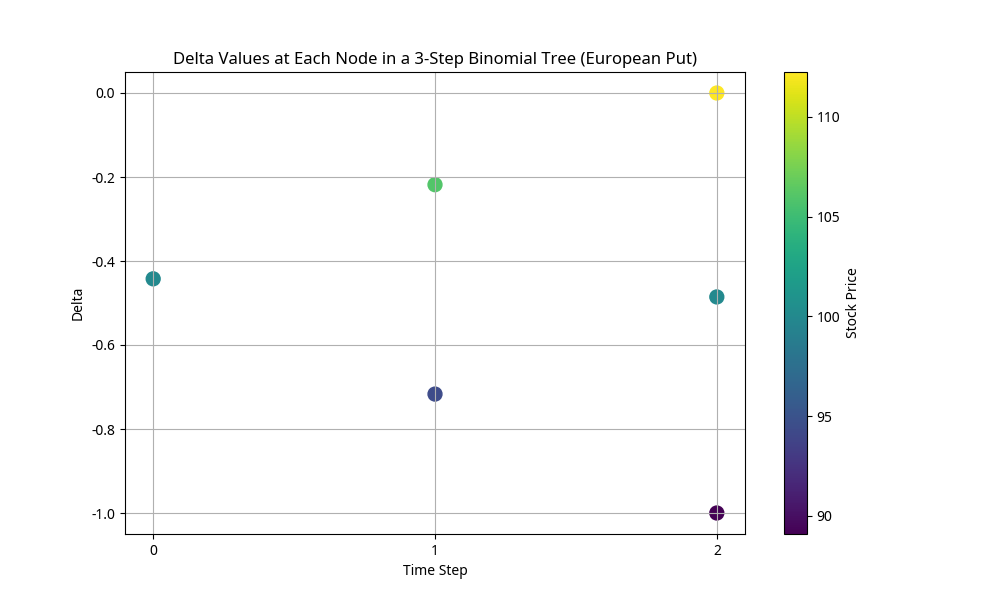

In [ ]:

import numpy as np
from scipy.stats import norm

# Given parameters (from Q25)
S0 = 180
r = 0.02
sigma = 0.25
T = 0.5
K = 182 # ATM strike for Asian option, so K should be close to S0
N = 25  # Number of steps (for Monte Carlo, this is number of averaging periods)

# --- Geometric Asian Option Pricing and Delta (Closed-Form) ---
# For a geometric Asian option, the average of the stock prices follows a log-normal distribution.
# The formulas are similar to Black-Scholes for European options, but with modified volatility and drift.

def geometric_asian_option_price(S0, K, T, r, sigma, N, option_type):
    # N here is the number of averaging periods (or steps in a discrete average)
    # For continuous averaging, N -> infinity. For discrete, we use N.
    # Adjust sigma and r for geometric average
    sigma_asian = sigma * np.sqrt((2 * N + 1) / (6 * (N + 1)))
    r_asian = r - (sigma**2 / 2) + (sigma_asian**2 / 2)

    d1 = (np.log(S0 / K) + (r_asian + (sigma_asian**2 / 2)) * T) / (sigma_asian * np.sqrt(T))
    d2 = d1 - sigma_asian * np.sqrt(T)

    if option_type == 'call':
        price = S0 * np.exp((r_asian - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * np.exp((r_asian - r) * T) * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return price

def geometric_asian_option_delta(S0, K, T, r, sigma, N, option_type):
    sigma_asian = sigma * np.sqrt((2 * N + 1) / (6 * (N + 1)))
    r_asian = r - (sigma**2 / 2) + (sigma_asian**2 / 2)

    d1 = (np.log(S0 / K) + (r_asian + (sigma_asian**2 / 2)) * T) / (sigma_asian * np.sqrt(T))

    if option_type == 'call':
        delta = np.exp((r_asian - r) * T) * norm.cdf(d1)
    elif option_type == 'put':
        delta = np.exp((r_asian - r) * T) * (norm.cdf(d1) - 1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return delta

# --- Monte Carlo Simulation for Arithmetic Asian Option Pricing (with Control Variate) ---
def arithmetic_asian_monte_carlo_cv(S0, K, T, r, sigma, N, num_simulations, option_type):
    dt = T / N
    
    # Generate paths for arithmetic average
    log_prices = np.zeros((num_simulations, N + 1))
    log_prices[:, 0] = np.log(S0)
    
    for i in range(num_simulations):
        for j in range(1, N + 1):
            z = np.random.standard_normal()
            log_prices[i, j] = log_prices[i, j-1] + (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z
    
    prices = np.exp(log_prices)
    arithmetic_averages = np.mean(prices[:, 1:], axis=1) # Average over the path (excluding S0)
    geometric_averages = np.exp(np.mean(log_prices[:, 1:], axis=1)) # Geometric average

    # Calculate payoffs for arithmetic and geometric options
    if option_type == 'call':
        payoffs_arithmetic = np.maximum(0, arithmetic_averages - K)
        payoffs_geometric = np.maximum(0, geometric_averages - K)
    elif option_type == 'put':
        payoffs_arithmetic = np.maximum(0, K - arithmetic_averages)
        payoffs_geometric = np.maximum(0, K - geometric_averages)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    # Calculate control variate parameters
    geometric_price_analytical = geometric_asian_option_price(S0, K, T, r, sigma, N, option_type)
    
    cov_xy = np.cov(payoffs_arithmetic, payoffs_geometric)[0, 1]
    var_y = np.var(payoffs_geometric)
    
    b_star = cov_xy / var_y if var_y != 0 else 0

    # Monte Carlo estimate with control variate
    mc_price_arithmetic = np.exp(-r * T) * (np.mean(payoffs_arithmetic) - b_star * (np.mean(payoffs_geometric) - geometric_price_analytical))
    
    return mc_price_arithmetic

# Price the Asian ATM Put option using Monte Carlo with Control Variate
num_simulations = 100000 # Increased simulations for better accuracy
asian_put_price_cv = arithmetic_asian_monte_carlo_cv(S0, K, T, r, sigma, N, num_simulations, 'put')
print(f"Asian ATM Put Option Price (Monte Carlo with CV, {num_simulations} simulations): {asian_put_price_cv:.2f}")

# --- Delta Hedging for Asian Options (Approximation using Geometric Delta) ---
# For a practical illustration, we will simulate a single path and demonstrate delta hedging.
# We will use the closed-form delta for a geometric Asian option as an approximation for the arithmetic Asian option's delta.
# This is a common simplification in practice when a full path-dependent delta is too complex or computationally expensive.

def asian_option_delta_hedging_simulation(S0, K, T, r, sigma, N_steps, option_type):
    dt = T / N_steps
    
    # Simulate one stock price path (for the hedging illustration)
    stock_path = [S0]
    for _ in range(N_steps):
        z = np.random.standard_normal()
        next_S = stock_path[-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
        stock_path.append(next_S)

    # Initialize portfolio
    cash_account = 0
    shares_held = 0
    option_premium = arithmetic_asian_monte_carlo_cv(S0, K, T, r, sigma, N_steps, 10000, option_type) # Use fewer simulations for initial premium for speed
    cash_account += option_premium # Seller receives premium

    print("\n--- Asian Option Delta Hedging Simulation (Single Path) ---")
    print(f"Initial Option Premium: {option_premium:.2f}")
    print("\n{: <10} {: <15} {: <15} {: <15} {: <15} {: <15}".format("Time", "Stock Price", "Delta (Approx)", "Shares Bought", "Cost/Proceeds", "Cash Account"))
    print("-" * 90)

    for i in range(N_steps):
        current_S = stock_path[i]
        time_to_maturity = T - i * dt

        # Estimate delta using the geometric Asian option delta formula
        # This is an approximation for the arithmetic Asian option's delta.
        current_delta = geometric_asian_option_delta(current_S, K, time_to_maturity, r, sigma, N_steps - i, option_type)

        # Calculate target shares to hold
        target_shares = -current_delta # For seller of a put option, delta is negative, so we buy shares

        # Adjust shares held
        shares_to_buy = target_shares - shares_held
        cost_proceeds = shares_to_buy * current_S

        cash_account -= cost_proceeds # Buying shares reduces cash, selling increases cash
        shares_held = target_shares

        print(f"{i*dt:<10.2f} {current_S:<15.2f} {current_delta:<15.4f} {shares_to_buy:<15.4f} {cost_proceeds:<15.2f} {cash_account:<15.2f}")

    # Final step at maturity
    final_S = stock_path[N_steps]
    final_average_price = np.mean(stock_path[1:]) # Average of the simulated path (excluding S0)

    # Option payoff at maturity
    if option_type == 'call':
        option_payoff = np.maximum(0, final_average_price - K)
    elif option_type == 'put':
        option_payoff = np.maximum(0, K - final_average_price)

    # Close out hedge position
    cash_account += shares_held * final_S
    shares_held = 0

    # Settle option payoff (seller pays payoff)
    cash_account -= option_payoff

    print("-" * 90)
    print(f"Final Stock Price: {final_S:.2f}")
    print(f"Final Average Price: {final_average_price:.2f}")
    print(f"Option Payoff at Maturity: {option_payoff:.2f}")
    print(f"Final Cash Account (after hedging and settlement): {cash_account:.2f}")
    print(f"Hedging Error: {cash_account:.2f}")

# Run the delta hedging simulation
asian_option_delta_hedging_simulation(S0, K, T, r, sigma, N, 'put')




Asian ATM Put Option Price (Monte Carlo with CV, 100000 simulations): 8.00



--- Asian Option Delta Hedging Simulation (Single Path) ---
Initial Option Premium: 8.00

Time       Stock Price     Delta (Approx)  Shares Bought   Cost/Proceeds   Cash Account   
------------------------------------------------------------------------------------------
0.00       180.00          -0.5200         0.5200          93.60           -85.59         
0.02       178.22          -0.5609         0.0409          7.29            -92.89         
0.04       191.88          -0.2751         -0.2858         -54.84          -38.05         
0.06       205.75          -0.0897         -0.1854         -38.15          0.10           
0.08       211.73          -0.0463         -0.0434         -9.19           9.29           
0.10       217.24          -0.0224         -0.0239         -5.19           14.48          
0.12       217.41          -0.0194         -0.0030         -0.65           15.13          
0.14       220.27          -0.0115         -0.0080         -1.75           16.88          